In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import call
from scipy.optimize import curve_fit
import os
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    path = '/res_files'

In [2]:
q2 = 10
q1s = [1,2,3,4,5,6,7,8,9]
l = 0.0
x = 2

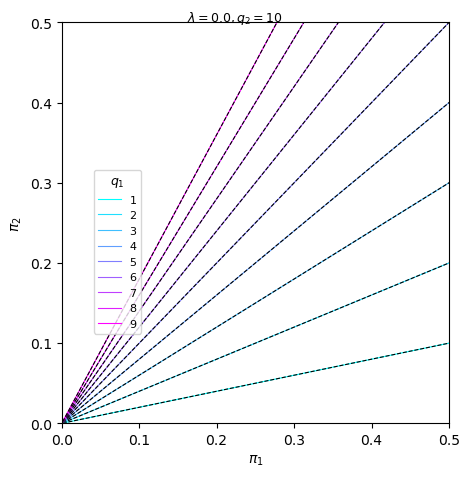

In [3]:
fig, ax = plt.subplots(figsize=(4.8,4.8))
colors = plt.cm.cool(np.linspace(0,1,len(q1s)))
ax.set(xlabel=r'$\pi_1$', ylabel=r'$\pi_2$', xlim=(0.0, 0.5), ylim=(0.0, 0.5))
for i,q1 in enumerate(q1s):
    #call(f'python find_Tlines_asym.py {q1} {q2} {l} {x}', shell=True)
    tline = pd.read_csv(f'{path}/Tline_asym_pis_q1_{q1}_q2_{q2}_l_{l}_f2_{int(x)}f1.csv')
    ax.plot(tline['pi1'], tline['pi2'], lw=0.8, color=colors[i], label=f'{q1}')
    ax.plot(tline['pi1'], 2*tline['pi1']*q1/q2, lw=0.8, color='k', ls='--')
fig.legend(title=r'$q_1$', fontsize=8, title_fontsize=9, loc=(0.2, 0.3))
#ax.set_aspect(1.0)
fig.text(0.4, 0.96, rf'$\lambda = {l}, q_2 = {q2}$', fontsize=9)
fig.tight_layout()

In [4]:
def pi2_trial(pi1, m3, n):
    delta = (q2-q1)/(q2+q1)
    return 2*q1/q2*pi1+l*q1/q2*(pi1+m3)**4+l*n

[-0.8747065  -0.63794565] [0.00581881 0.00052415]
[-0.63268665 -0.46295428] [0.00488327 0.00050745]
[-0.47098161 -0.27859727] [0.00462996 0.00033137]
[-0.31644895 -0.09313191] [0.00419251 0.00017061]


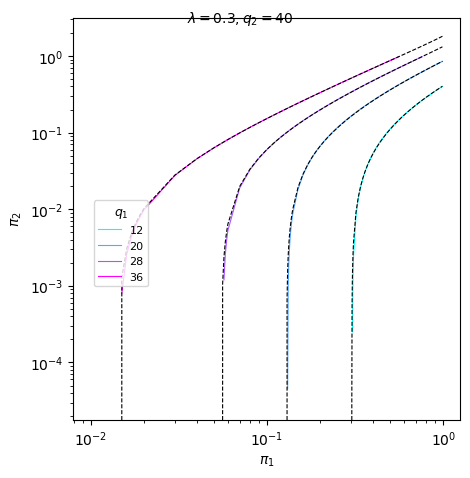

In [24]:
#q2 = 10
#q1s = [2,3,4,5,6,7,8,9]
q2 = 40
q1s = [12,20,28,36]
l = 0.3
x = 2

fig, ax = plt.subplots(figsize=(4.8,4.8))
colors = plt.cm.cool(np.linspace(0,1,len(q1s)))
ax.set(xlabel=r'$\pi_1$', ylabel=r'$\pi_2$', xscale='log', yscale='log') # , xlim=(0.0, 0.5), ylim=(-0.1, 0.5)
for i,q1 in enumerate(q1s):
    #call(f'python find_Tlines_asym.py {q1} {q2} {l} {x}', shell=True)
    tline = pd.read_csv(f'{path}/Tline_asym_pis_q1_{q1}_q2_{q2}_l_{l}_f2_{int(x)}f1.csv')
    ax.plot(tline['pi1'], tline['pi2'], lw=0.8, color=colors[i], label=f'{q1}')
    tline_filtered = tline.query('pi2 == pi2')
    #ax.plot(tline['pi1'], 2*tline['pi1']*q1/q2, lw=0.8, color='k', ls='--')
    params, pcov = curve_fit(pi2_trial, tline_filtered['pi1'], tline_filtered['pi2'])
    perr = np.sqrt(np.diag(pcov))
    ax.plot(tline['pi1'], pi2_trial(tline['pi1'], *params), lw=0.8, color='k', ls='--')
    print(params, perr)
fig.legend(title=r'$q_1$', fontsize=8, title_fontsize=9, loc=(0.2, 0.4))
#ax.set_aspect(1.0)
fig.text(0.4, 0.96, rf'$\lambda = {l}, q_2 = {q2}$')
fig.tight_layout()

[-0.97774137 -0.73520447]
[-0.82018784 -0.59616343]
[-0.68118377 -0.45025597]
[-0.53585279 -0.30007086]
[-0.40220792 -0.15010423]


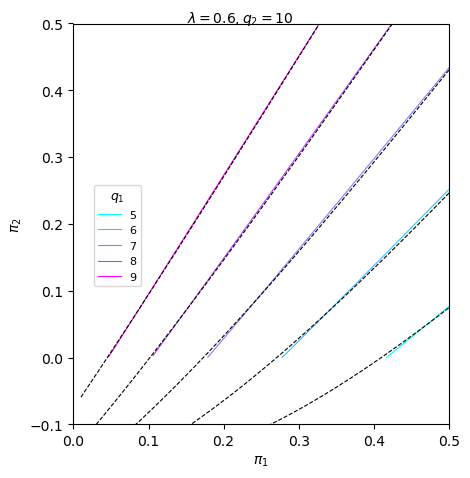

In [6]:
q2 = 10
q1s = [5,6,7,8,9]
l = 0.6
x = 2

fig, ax = plt.subplots(figsize=(4.8,4.8))
colors = plt.cm.cool(np.linspace(0,1,len(q1s)))
ax.set(xlabel=r'$\pi_1$', ylabel=r'$\pi_2$', xlim=(0.0, 0.5), ylim=(-0.1, 0.5))
for i,q1 in enumerate(q1s):
    #call(f'python find_Tlines_asym.py {q1} {q2} {l} {x}', shell=True)
    tline = pd.read_csv(f'{path}/Tline_asym_pis_q1_{q1}_q2_{q2}_l_{l}_f2_{int(x)}f1.csv')
    ax.plot(tline['pi1'], tline['pi2'], lw=0.8, color=colors[i], label=f'{q1}')
    tline_filtered = tline.query('pi2 == pi2')
    #ax.plot(tline['pi1'], 2*tline['pi1']*q1/q2, lw=0.8, color='k', ls='--')
    params, _ = curve_fit(pi2_trial, tline_filtered['pi1'], tline_filtered['pi2'])
    ax.plot(tline['pi1'], pi2_trial(tline['pi1'], *params), lw=0.8, color='k', ls='--')
    print(params)
fig.legend(title=r'$q_1$', fontsize=8, title_fontsize=9, loc=(0.2, 0.4))
#ax.set_aspect(1.0)
fig.text(0.4, 0.96, rf'$\lambda = {l}, q_2 = {q2}$')
fig.tight_layout()

In [39]:
def pi2_0_trial(pi1, m2, n2):
    delta = (q2-q1)/(q2+q1)
    m1 = 0.015
    n = 1.1016*delta**0.6815 - 1.9206
    #return l*q1/q2*(pi1+m3)**4+l*n
    return l**n2*m1*(pi1+m2)**4 + l*delta*n

[-0.72408244 13.70775695] [  80644.45516263 2707136.04179091]
[-0.52271812 18.97668188] [ 204458.37100205 4871718.46649501]
[-0.3231669 18.6890386] [ 135619.64396018 4075312.55737223]


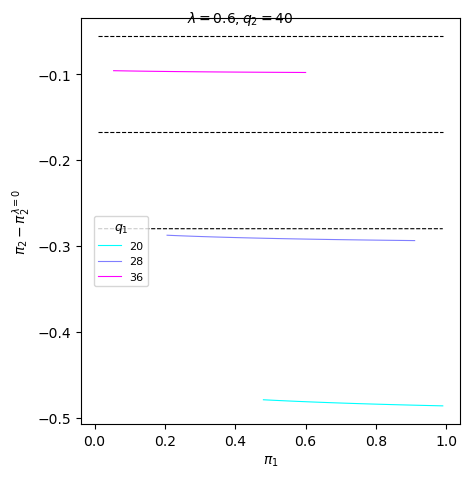

In [40]:
#q2 = 10
#q1s = [2,3,4,5,6,7,8,9]
q2 = 40
q1s = [20,28,36]
l = 0.6
x = 2

fig, ax = plt.subplots(figsize=(4.8,4.8))
colors = plt.cm.cool(np.linspace(0,1,len(q1s)))
ax.set(xlabel=r'$\pi_1$', ylabel=r'$\pi_2 - \pi_2^{\lambda = 0}$') # , xlim=(0.0, 0.5), ylim=(-0.1, 0.5)
for i,q1 in enumerate(q1s):
    #call(f'python find_Tlines_asym.py {q1} {q2} {l} {x}', shell=True)
    tline = pd.read_csv(f'{path}/Tline_asym_pis_q1_{q1}_q2_{q2}_l_{l}_f2_{int(x)}f1.csv')
    tline0 = pd.read_csv(f'{path}/Tline_asym_pis_q1_{q1}_q2_{q2}_l_0.0_f2_{int(x)}f1.csv')
    #tline['pi2_0'] = tline['pi2'] - tline0['pi2']
    tline['pi2_0'] = tline['pi2'] - 2*tline['pi1']*q1/q2
    #ax.plot(tline['pi1'], tline['pi2_0'], lw=0.8, color=colors[i], label=f'{q1}')
    delta = (q2-q1)/(q2+q1)
    #ax.axhline(, ls='--', color='k', lw=0.8)
    # fit:
    tline_filtered = tline.query('pi2_0 == pi2_0')
    params, pcov = curve_fit(pi2_0_trial, tline_filtered['pi1'], tline_filtered['pi2_0'])
    perr = np.sqrt(np.diag(pcov))
    print(params, perr)
    ax.plot(tline['pi1'], pi2_0_trial(tline['pi1'], *params), lw=0.8, color='k', ls='--')
    ax.plot(tline['pi1'], tline['pi2_0'], lw=0.8, color=colors[i], label=f'{q1}')
fig.legend(title=r'$q_1$', fontsize=8, title_fontsize=9, loc=(0.2, 0.4))
#ax.set_aspect(1.0)
fig.text(0.4, 0.96, rf'$\lambda = {l}, q_2 = {q2}$')
fig.tight_layout()

[ 1.10161684 -1.92026619  0.68146049]


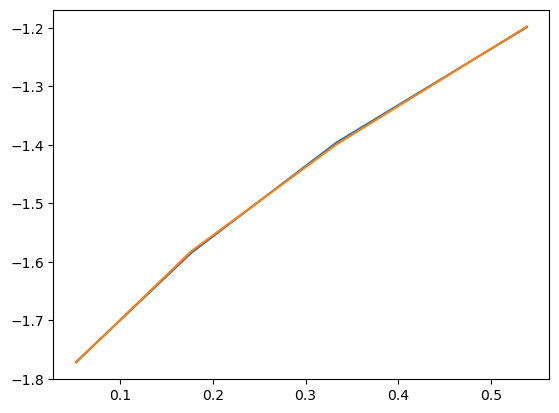

In [15]:
n = [-1.1989, -1.3961, -1.5852, -1.7714]
q2 = 40
q1s = [12,20,28,36]
delta = [(q2-q1)/(q2+q1) for q1 in q1s]
fig, ax = plt.subplots()
ax.plot(delta, n)

def func(x,a,b,c):
    return a*x**c+b

params, pcov = curve_fit(func, delta, n)
fit = func(delta, *params)
ax.plot(delta, fit)
print(params)

In [32]:
def lambda_trial(pi2, m3):
    return (pi2-2*q1/q2*pi1)*m3*l*pi2**2

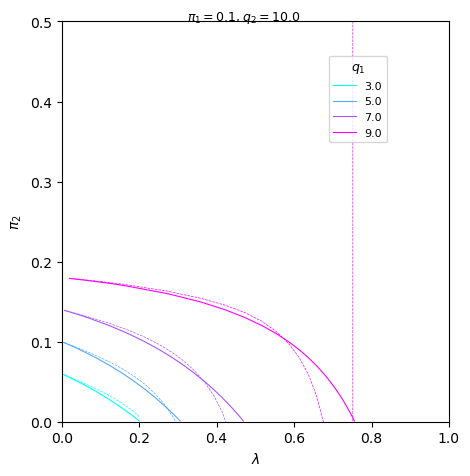

In [215]:
from f0poly_sols_clean import f0_lambda_neq_0, f0_lambda_eq_0
q2 = 40.0
q1s = [12.0,20.0,28.0,36.0]
q2 = 10.0
q1s = [3.0, 5.0, 7.0, 9.0]
pi1 = 0.1
x = 2

def pi2_teo(l,pi2):
    #if l >= 0.4:
    #    corr = 1/20*1/(0.35*np.sqrt(2*3.141592))*np.exp(-0.5*((l-0.35)/0.35)**2)
    #    slope = (1/q2 - f0_lambda_eq_0(pi1, pi2, 20.0, q2, 0.0)/3)/(0.95/2)
    #    n = f0_lambda_eq_0(pi1, pi2, 20.0, q2, 0.0)/2
    #    f0 = -slope/1.1*l+n #-corr
    #else:
    #    n = f0_lambda_eq_0(pi1, pi2, 20.0, q2, 0.0)
    #    slope = f0_lambda_eq_0(pi1, pi2, 20.0, q2, 0.0)*(1/4 - 1)/(0.4)
    #    f0 = -slope/1.1*l+n
    if l == 0.0:
        f0 = f0_lambda_eq_0(pi1, pi2, q1, q2, l)
    else:
        _, f0, _ = f0_lambda_neq_0(pi1, pi2, q1, q2, l)
    return 2*pi1*q1/q2 * (1-l*f0*q2)/(1-l*f0*q1)

def gaussian(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-x**2 / 2)

def gaussian_cumulative(x):
    return (1/2) * (1 + erf(x/np.sqrt(2)))

def skewed_gaussian(x, alpha):
    return gaussian(x)*gaussian_cumulative(alpha*x)

def pi2_teo_aprox(l,pi2):
    m = (1/q2 - f0_lambda_eq_0(pi1, pi2, q1, q2, l))/(0.98)
    n = f0_lambda_eq_0(pi1, pi2, q1, q2, l)
    f0 = m*l**(0.5)+n
    #mu, sigma = 0.5, 0.28
    #m = m*0.98
    #piavg = (pi1 + pi2)/2
    gaussian_corr = piavg**3*np.exp(piavg)*(delta**(1/4))*(2/sigma)*skewed_gaussian((l-mu)/sigma, -0.4)
    f0 = f0 - gaussian_corr
    return 2*pi1*q1/q2 * (1-l*f0*q2)/(1-l*f0*q1)

fig, ax = plt.subplots(figsize=(4.8,4.8))
colors = plt.cm.cool(np.linspace(0,1,len(q1s)))
ax.set(ylabel=r'$\pi_2$', xlabel=r'$\lambda$', ylim=(0.0,0.5), xlim=(0.0,1.0)) # 
for i,q1 in enumerate(q1s):
    delta = (q2 - q1) / (q2 + q1)
    if not os.path.exists(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{q1}_q2_{q2}_f2_{int(x)}f1.csv'):
        call(f'python find_Tlines_asym_fixPi1.py {q1} {q2} {pi1} {x}', shell=True)
    tline = pd.read_csv(f'{path}/Tline_asym_fixPi1_pi1_{pi1}_q1_{q1}_q2_{q2}_f2_{int(x)}f1.csv')
    #tline_aux = pd.read_csv(f'{path}/Tline_asym_pis_q1_{int(q1)}_q2_{int(q2)}_l_{l}_f2_{int(x)}f1.csv')
    #tline_aux_filtered = tline_aux.query('pi2 == pi2')
    #params, pcov = curve_fit(pi2_trial, tline_aux_filtered['pi1'], tline_aux_filtered['pi2'])
    tline = tline.rename(columns={'lambda':'lamb'})
    tline_filtered = tline.query('lamb == lamb')
    #params, _ = curve_fit(lambda_trial, tline_filtered['pi2'], tline_filtered['lamb'])
    #print(params)
    ax.plot(tline['lamb'], tline['pi2'], lw=0.8, color=colors[i], label=f'{q1}')
    #ax.plot(tline['pi2'], lambda_trial(tline['pi2'], *params), lw=0.8, color='k', ls='--')
    # comprovacions limits:
    #ax.axhline(2*pi1*q1/q2, lw=0.6, color='k', ls='-.')
    # linea teorica:
    pi2_formula = []
    for l,pi2 in zip(tline['lamb'],tline['pi2']):
        pi2_formula.append(pi2_teo_aprox(l,pi2))
    ax.plot(tline['lamb'], pi2_formula, color=colors[i], ls='--', lw=0.5)
fig.legend(title=r'$q_1$', fontsize=8, title_fontsize=9, loc=(0.7, 0.7))
fig.text(0.4, 0.96, rf'$\pi_1= {pi1}, q_2 = {q2}$', fontsize=9)
fig.tight_layout()

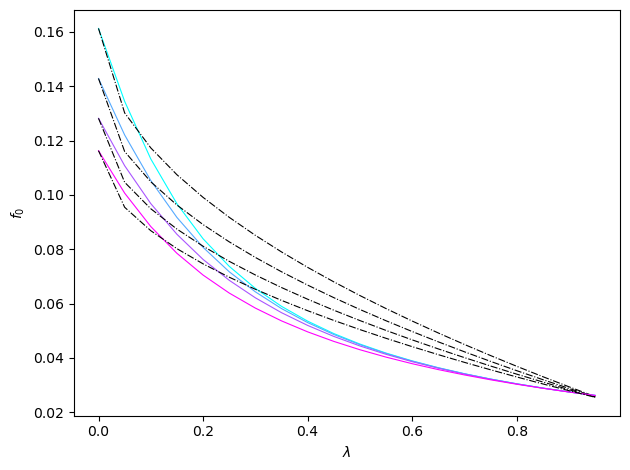

In [212]:
from f0poly_sols_clean import f0_lambda_neq_0, f0_lambda_eq_0
from scipy.special import erf

q1s = [12.0,20.0,28.0,36.0]
q2 = 40.0

q_pairs = [(7.0, 10.0), (28.0, 40.0)]
colors = plt.cm.cool(np.linspace(0,1,len(q1s)))

fig, ax = plt.subplots()
#pi1, pi2 = 0.1, 0.1
#fig, ax = plt.subplots(1,3)
pi_pairs = ([0.1, 0.1], ) # [0.2, 0.2], [0.3, 0.3]

def gaussian(x):
    return 1/np.sqrt(2*np.pi) * np.exp(-x**2 / 2)

def gaussian_cumulative(x):
    return (1/2) * (1 + erf(x/np.sqrt(2)))

def skewed_gaussian(x, alpha):
    return gaussian(x)*gaussian_cumulative(alpha*x)
    

ls = np.linspace(0.0, 0.95, 20)
for j,pi_pair in enumerate(pi_pairs):
    pi1, pi2 = pi_pair
    for i,q1 in enumerate(q1s):
    #for q_pair in q_pairs:
        #q1, q2 = q_pair
        delta = (q2 - q1) / (q2 + q1)
        f0s = []
        for l in ls:
            if l == 0.0:
                f0 = f0_lambda_eq_0(pi1, pi2, q1, q2, l)
            else:
                _, f0, _ = f0_lambda_neq_0(pi1, pi2, q1, q2, l)
            f0s.append(f0)
        ax.plot(ls, f0s, color=colors[i], label=f'{q1}', alpha=1.0-j*0.2, lw=0.8)
        m = (1/q2 - f0_lambda_eq_0(pi1, pi2, q1, q2, l))/(0.98)
        #m = m*0.98
        n = f0_lambda_eq_0(pi1, pi2, q1, q2, l)
        f0s = m*ls**0.5+n 
        #f0s = -m*np.exp(-ls) - ls*q1/q2
        #ax.plot(ls, f0s, color='k', lw=0.8, ls='-.')
        mu, sigma = 0.5, 0.1
        piavg = (pi1+pi2)/2
        gaussian_corr = piavg**3*np.exp(piavg)*(delta**(1/4))*(2/sigma)*skewed_gaussian((ls-mu)/sigma, -0.4)
        #ax.plot(ls, gaussian_corr, color='r', lw=0.8, ls='-.')
        f0s = f0s #- gaussian_corr
        ax.plot(ls, f0s, color='k', lw=0.8, ls='-.')
        
#ax.plot(ls, 0.1*np.exp(-(ls**(0.9)))+1/4000*ls**-1.7, color='k', ls='-.', lw=0.8)
#ax.plot(ls,1/10*np.exp(-ls*pi1/2)/(np.sqrt(ls)+np.sqrt(np.sqrt(ls))), color='k', ls='-.', lw=0.8)
#slope = (1/q2 - f0_lambda_eq_0(pi1, pi2, 20.0, q2, 0.0)/3)/(0.95/2)
#n = f0_lambda_eq_0(pi1, pi2, 20.0, q2, 0.0)/2
#corr = 1/20*1/(0.35*np.sqrt(2*3.141592))*np.exp(-0.5*((ls-0.35)/0.35)**2)
#ax.plot(ls, slope/1.1*ls+n, color='k', ls='-.', lw=0.8)
#ax.plot(ls, corr, color='k', ls='-.', lw=0.8)

#n2 = f0_lambda_eq_0(pi1, pi2, 20.0, q2, 0.0)
#slope2 = f0_lambda_eq_0(pi1, pi2, 20.0, q2, 0.0)*(1/4 - 1)/(0.4)
#ax.plot(ls, slope2/1.1*ls+n2, color='k', ls='-.', lw=0.8)

ax.set(xlabel='$\lambda$', ylabel='$f_0$') # , xscale='log', yscale='log'
fig.tight_layout()